In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import os

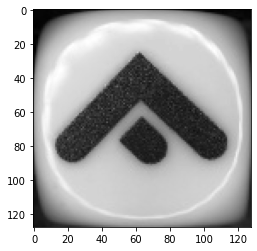

In [2]:
img = Image.open("../../data/train_set/08/16_09_21_08_020.png")
plt.imshow(img, cmap="gray")

In [3]:
img = np.array(img)

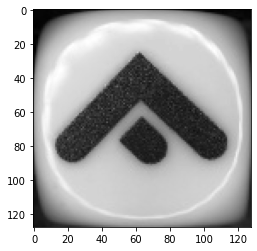

In [4]:
plt.imshow(img, cmap="gray")

In [5]:
img.shape

(128, 128)

In [6]:
print(img[0])

[ 15  15  15  15  15  15  15  14  13  15  15  16  17  16  16  19  17  17
  16  18  20  19  17  18  18  20  20  22  25  25  24  23  22  25  29  32
  36  44  54  60  72  78  86  92  98 104 109 112 115 117 120 122 125 126
 127 127 129 129 129 130 131 132 132 132 133 133 132 130 129 128 127 127
 123 123 123 122 120 116 112 109 105 102  96  89  83  75  67  60  51  44
  36  30  26  23  20  17  18  16  18  19  17  15  16  16  14  14  15  15
  13  13  14  13  12  14  16  17  16  18  18  16  15  13  13  13  12  12
  13  12]


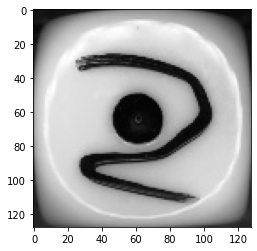

In [7]:
img = Image.open("../../data/train_set/ano/17_11_21_anomalies_000.png")
plt.imshow(img, cmap="gray")

In [8]:
def create_dataset():
    directory = "../../data/train_set/"
    data= []
    label= []
    for i in range(0, 10):
        for filename in os.listdir(directory+"0"+str(i)):
            if filename.endswith(".png"):
                img = Image.open(directory+"0"+str(i)+"/"+filename)
                data.append(np.array(img))
                label.append(i+1)
                
    print(len(data))
    return data, label
            
        

In [9]:
data, labels= create_dataset()

6151


In [10]:
data[:10][1]

array([[81, 83, 83, ..., 39, 39, 39],
       [85, 85, 85, ..., 37, 38, 38],
       [89, 89, 87, ..., 36, 37, 39],
       ...,
       [28, 29, 31, ..., 67, 66, 65],
       [27, 29, 30, ..., 68, 68, 67],
       [26, 27, 28, ..., 67, 66, 66]], dtype=uint8)

In [11]:
data = np.array(data)
data.shape

(6151, 128, 128)

In [12]:
preprocessed_data = data/255
labels= np.array(labels).reshape(-1,1)

In [13]:
print("Drawings shape before : ", preprocessed_data.shape)
preprocessed_data = np.expand_dims(preprocessed_data, axis=3)
print("Drawings shape after : ", preprocessed_data.shape)
print("Label shape : ", labels.shape)

Drawings shape before :  (6151, 128, 128)
Drawings shape after :  (6151, 128, 128, 1)
Label shape :  (6151, 1)


In [14]:
from sklearn.model_selection import train_test_split

# split data in train/val/test set
train_val_data, test_data, train_val_labels, test_labels = train_test_split(
    preprocessed_data, 
    labels,
    test_size=0.2, 
    random_state=42, 
    shuffle=True
)

train_data, val_data, train_labels, val_labels = train_test_split(
    train_val_data, 
    train_val_labels,
    test_size=0.3, 
    random_state=42, 
    shuffle=True
)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# pixel width and height of our images
input_size = 28

# number of filters in the convnet layer
filters = 64

# conv net parameters
strides = (2, 2)
pool_size = (2,2)
kernel_size = (5, 5)

In [ ]:
train_data

In [ ]:
plt.imshow(preprocessed_data[400], cmap="gray")

In [ ]:
model = tf.keras.Sequential(
    [
        layers.Conv2D(filters, kernel_size, activation = "relu", input_shape= (128,128, 1)),
        layers.Flatten(),
        layers.Dense(units=11),
    ]
)

# model.build()
model.summary()

In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001), loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics= ['accuracy'])

history = model.fit(x=train_data,y=train_labels, validation_data=(train_val_data, train_val_labels), epochs=2)

In [ ]:
model.evaluate(test_data, test_labels, verbose=0)

In [ ]:
def plot_history(history):
    """ This helper function takes the tensorflow.python.keras.callbacks.History
    that is output from your `fit` method to plot the loss and accuracy of
    the training and validation set.
    """
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    axs[0].plot(history.history['accuracy'], label='training set')
    axs[0].plot(history.history['val_accuracy'], label = 'validation set')
    axs[0].set(xlabel = 'Epoch', ylabel='Accuracy', ylim=[0, 1])

    axs[1].plot(history.history['loss'], label='training set')
    axs[1].plot(history.history['val_loss'], label = 'validation set')
    axs[1].set(xlabel = 'Epoch', ylabel='Loss', ylim=[0, 10])
    
    axs[0].legend(loc='lower right')
    axs[1].legend(loc='lower right')
    
plot_history(history)

In [ ]:
img = Image.open("../../data/test_set/09/17_11_21_09_050.png")
plt.imshow(img, cmap="gray")

In [ ]:
prediction = model.predict(np.array(img).reshape(1, 128, 128, 1))
print(prediction)

In [ ]:
classes = np.argmax(prediction, axis = 1)
print(classes)